In [28]:
#Dataframe
import pandas as pd
import numpy as np
from numpy import sqrt
import math
#matplotlib
import matplotlib.pyplot  as plt
#Plotly
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot


In [29]:
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#Computation
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [30]:
#deep-learning models
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout


In [31]:
#warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
#!pip install yfinance 
import yfinance as yf

In [33]:
df = yf.download("^NSEI",start="2022-01-01", end="2023-01-01")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300
...,...,...,...,...,...,...
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900


In [34]:
nifty_50_df = df.fillna(method='ffill')
nifty_50_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300
...,...,...,...,...,...,...
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900


In [35]:
nifty_50_df['SMA50'] = nifty_50_df['Close'].rolling(50).mean()
nifty_50_df

,Open,High,Low,Close,Adj Close,Volume,SMA50
Date,,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,NaN
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,NaN
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,NaN
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,NaN
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,NaN
...,...,...,...,...,...,...,...
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700,18200.374961
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300,18219.306992
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900,18235.520977


In [36]:
nifty_50_df['SMA50'] = nifty_50_df['Close'].rolling(50).mean()

In [37]:
nifty_50_df.dropna(inplace=True)
nifty_50_df

,Open,High,Low,Close,Adj Close,Volume,SMA50
Date,,,,,,,
2022-03-15,16900.650391,16927.750000,16555.000000,16663.000000,16663.000000,381600,17285.243984
2022-03-16,16876.650391,16987.900391,16837.849609,16975.349609,16975.349609,260000,17272.236992
2022-03-17,17202.900391,17344.599609,17175.750000,17287.050781,17287.050781,448300,17261.873008
2022-03-21,17329.500000,17353.349609,17096.400391,17117.599609,17117.599609,285500,17245.720000
2022-03-22,17120.400391,17334.400391,17006.300781,17315.500000,17315.500000,338300,17237.111992
...,...,...,...,...,...,...,...
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700,18200.374961
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300,18219.306992
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900,18235.520977


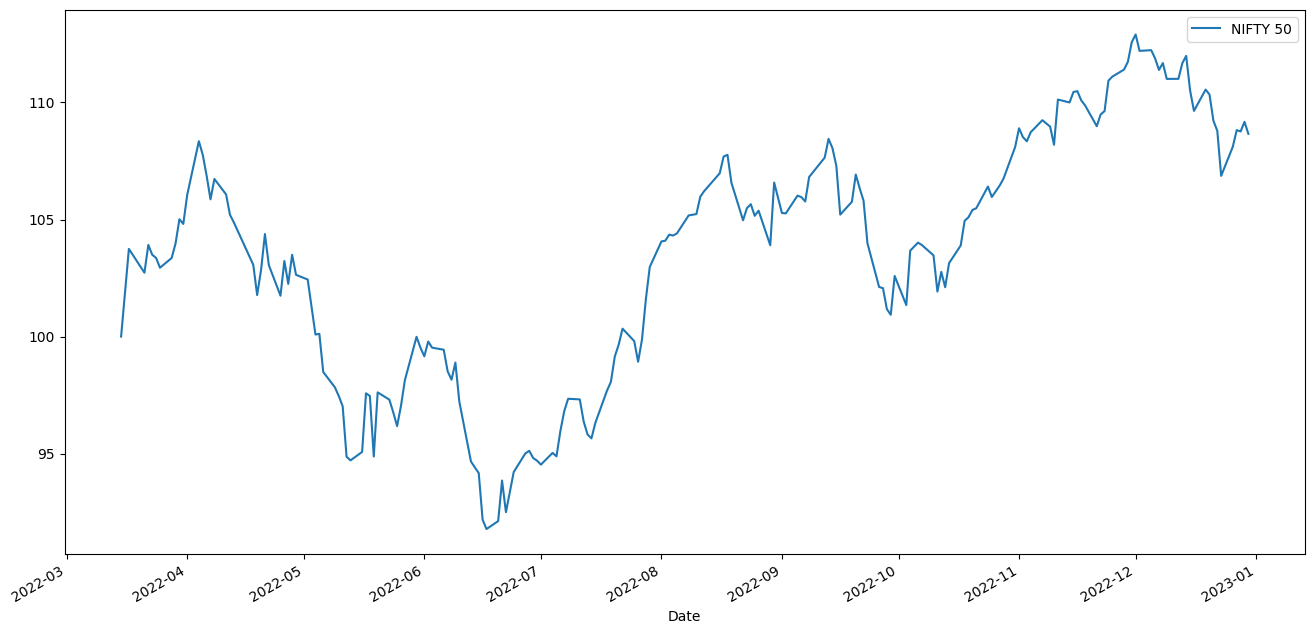

In [38]:
normalised_nifty_50_df = nifty_50_df["Close"].div(nifty_50_df["Close"].iloc[0]).mul(100)
normalised_nifty_50_df.plot(figsize=(16, 8))
plt.legend(['NIFTY 50'])
plt.show()

<Axes: xlabel='Date'>

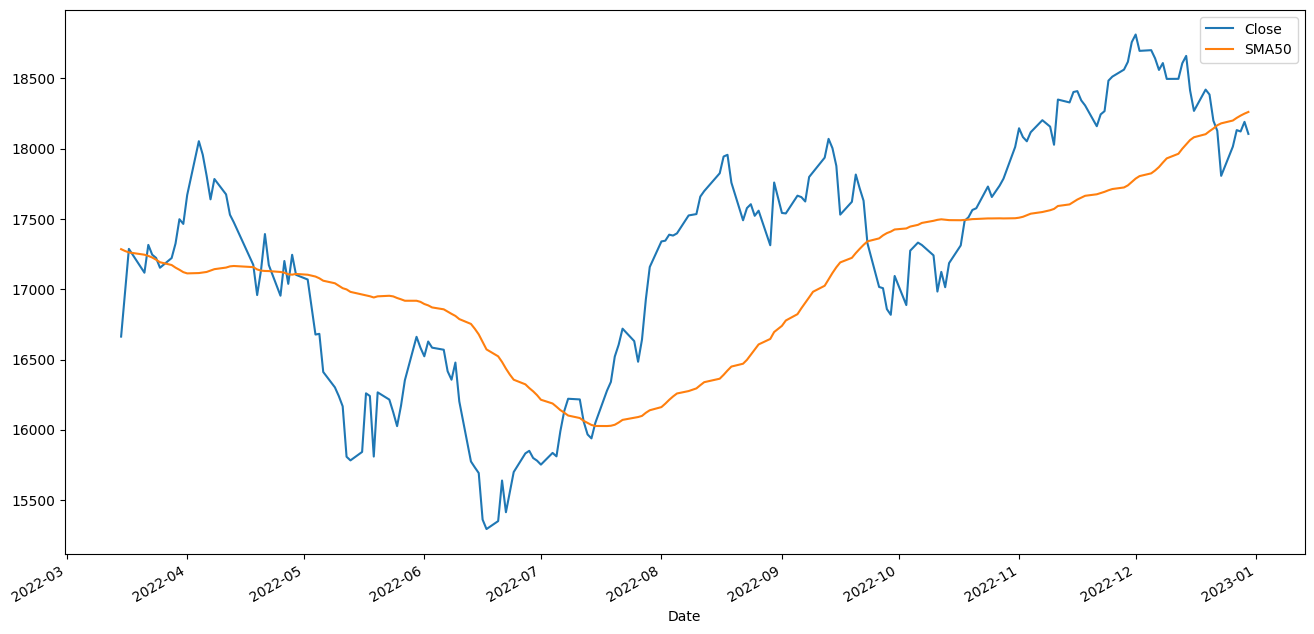

In [39]:
# plotting Close price and simple
# moving average of 50 days using .plot() method
nifty_50_df[['Close', 'SMA50']].plot(label='NIFTY50',
                                  figsize=(16, 8))

In [40]:
#X = nifty_50_df.drop(["Close","Adj Close", "Volume", "High", "Low", "SMA50"],axis=1)
#y = nifty_50_df["Close"]
#Creating a new dataframe with only the close column
data = nifty_50_df.filter(['Close'])
#I converted the dataframe into a numpy array
dataset = data.values
# Getting the number of rows to train the model on
training_data_len =math.ceil(len(dataset) * .8)
training_data_len

160

In [41]:
#scaling the data, to a py preprocessing  tranformations 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(199, 1)

In [42]:
# Creating training dataset
train_data = scaled_data[0:training_data_len, :]

# spliting data into x and y 
x_train = []
y_train = []
for i in range (80, len(train_data)):
  x_train.append(train_data[i-80:i, 0])
  y_train.append(train_data[i, 0])
  if i<=85:
    print(x_train)
    print(y_train)
    print()

[array([0.38917306, 0.47793396, 0.56651059, 0.51835738, 0.57459506,
       0.55474578, 0.54823814, 0.52841716, 0.54802501, 0.57738016,
       0.62652742, 0.61700767, 0.67546156, 0.78428542, 0.75700494,
       0.71445024, 0.6666811 , 0.70782882, 0.67674033, 0.63563535,
       0.62010525, 0.53428542, 0.47318852, 0.52374276, 0.59650458,
       0.53380199, 0.47185258, 0.54200079, 0.49585121, 0.55457539,
       0.51408093, 0.50457505, 0.39332186, 0.39475714, 0.31763285,
       0.28654436, 0.26898261, 0.24825223, 0.14620631, 0.13886058,
       0.15595334, 0.27445291, 0.26905365, 0.14660426, 0.27639966,
       0.26177897, 0.23633146, 0.20809884, 0.24911918, 0.30092361,
       0.3887185 , 0.36688002, 0.34931799, 0.37922705, 0.36680897,
       0.36261744, 0.31908201, 0.30200341, 0.33662961, 0.25811304,
       0.13665825, 0.12463757, 0.11328514, 0.01906781, 0.        ,
       0.01609843, 0.09812441, 0.03404371, 0.07477988, 0.11530264,
       0.15304058, 0.15819841, 0.14367707, 0.13832055, 0.1303

In [43]:
# Converting the dataset into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#making the data traineable
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # 1 is just the number of features that is the closing price. 
x_train.shape

(80, 80, 1)

In [44]:
#creating testing dataset
#scales values from 2168 to 2497
test_data= scaled_data[training_data_len -80: , :]
#x_test and y_test
x_test =[]
y_test = dataset [training_data_len:, :]
for i in range (80, len (test_data)):
  x_test.append(test_data[i-80:i, 0])

In [45]:
#converting test data to a numpy array
x_test=np.array(x_test) #so we can predict using LSTM model

#reshaping data from 2D to 3D for LSTM 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [46]:
# Building the model
model = Sequential()
model.add(LSTM(4, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(4))
model.add(Dense(1))
model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 4)             96        
                                                                 
 lstm_1 (LSTM)               (None, 4)                 144       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [47]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15


2023-04-12 14:56:06.301028: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 9s 46ms/step - loss: 0.2663
Epoch 2/15
16/16 [==============================] - 1s 39ms/step - loss: 0.1574
Epoch 3/15
16/16 [==============================] - 0s 28ms/step - loss: 0.0539
Epoch 4/15
16/16 [==============================] - 0s 29ms/step - loss: 0.0144
Epoch 5/15
16/16 [==============================] - 0s 29ms/step - loss: 0.0126
Epoch 6/15
16/16 [==============================] - 0s 29ms/step - loss: 0.0116
Epoch 7/15
16/16 [==============================] - 1s 43ms/step - loss: 0.0113
Epoch 8/15
16/16 [==============================] - 1s 45ms/step - loss: 0.0111
Epoch 9/15
16/16 [==============================] - 1s 33ms/step - loss: 0.0107
Epoch 10/15
16/16 [==============================] - 0s 27ms/step - loss: 0.0107
Epoch 11/15
16/16 [==============================] - 0s 29ms/step - loss: 0.0106
Epoch 12/15
16/16 [==============================] - 1s 39ms/step - loss: 0.0103
Epoch 13/15
16/16 [=============================

In [49]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 2s 146ms/step


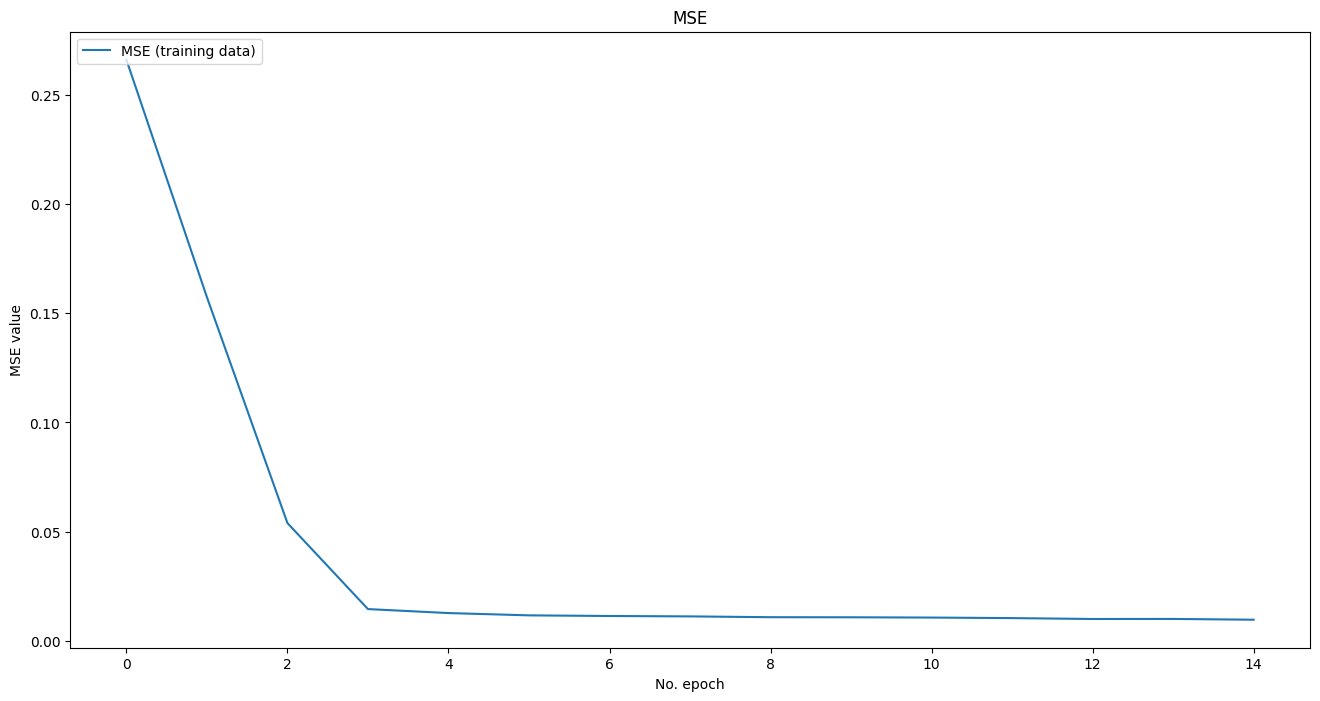

In [50]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [51]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

413.0678084935897

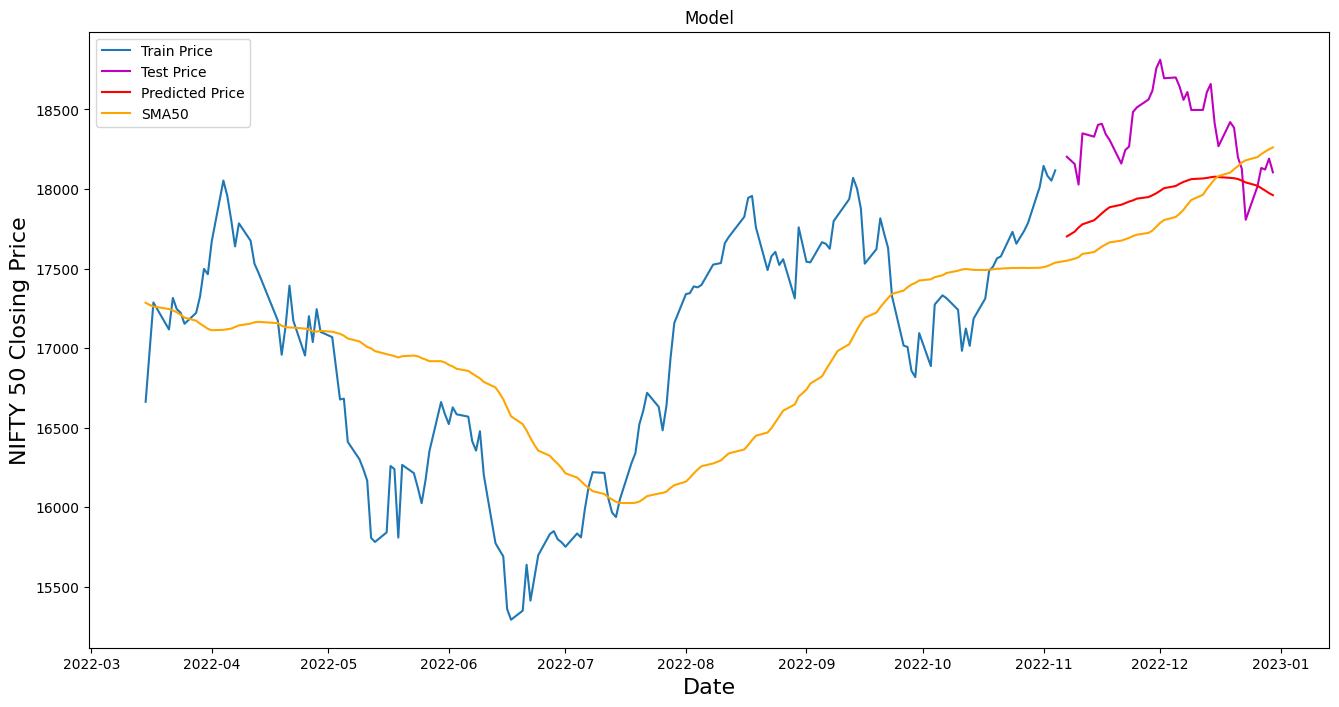

In [52]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [53]:
# the actual values  and predicted prices
test

,Close,predictions
Date,,
2022-11-07,18202.800781,17702.246094
2022-11-09,18157.000000,17732.044922
2022-11-10,18028.199219,17757.972656
2022-11-11,18349.699219,17778.222656
2022-11-14,18329.150391,17803.765625
2022-11-15,18403.400391,17825.179688
2022-11-16,18409.650391,17847.251953
2022-11-17,18343.900391,17867.939453
2022-11-18,18307.650391,17885.734375


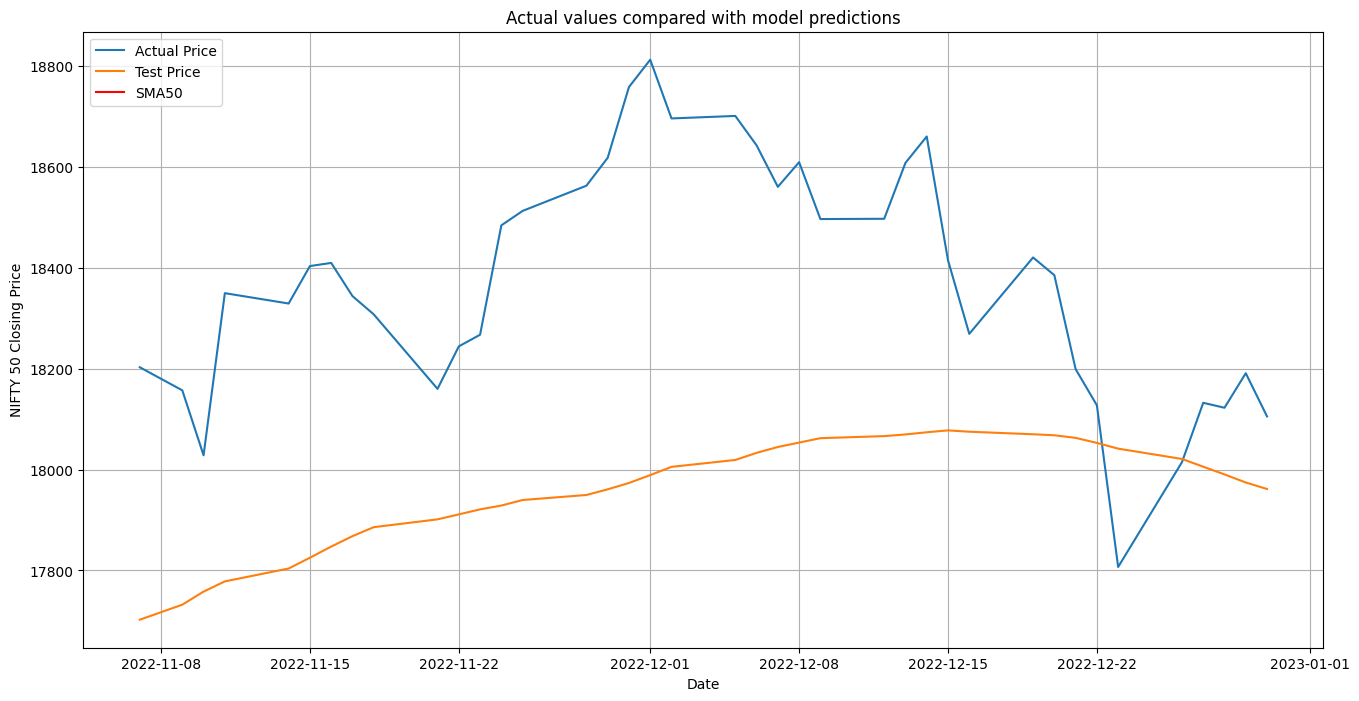

In [54]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

In [55]:
# Building the model
model = Sequential()
model.add(LSTM(4, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(4, return_sequences=True))
model.add(LSTM(4))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 80, 4)             96        
                                                                 
 lstm_3 (LSTM)               (None, 80, 4)             144       
                                                                 
 lstm_4 (LSTM)               (None, 4)                 144       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [56]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
16/16 [==============================] - 4s 38ms/step - loss: 0.3929
Epoch 2/15
16/16 [==============================] - 1s 65ms/step - loss: 0.3164
Epoch 3/15
16/16 [==============================] - 1s 62ms/step - loss: 0.2561
Epoch 4/15
16/16 [==============================] - 1s 45ms/step - loss: 0.1801
Epoch 5/15
16/16 [==============================] - 1s 34ms/step - loss: 0.0735
Epoch 6/15
16/16 [==============================] - 1s 45ms/step - loss: 0.0185
Epoch 7/15
16/16 [==============================] - 1s 43ms/step - loss: 0.0182
Epoch 8/15
16/16 [==============================] - 1s 66ms/step - loss: 0.0163
Epoch 9/15
16/16 [==============================] - 1s 47ms/step - loss: 0.0151
Epoch 10/15
16/16 [==============================] - 0s 31ms/step - loss: 0.0147
Epoch 11/15
16/16 [==============================] - 1s 34ms/step - loss: 0.0143
Epoch 12/15
16/16 [==============================] - 1s 33ms/step - loss: 0.0140
Epoch 13/15
16/16 [==================

In [58]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 50ms/step


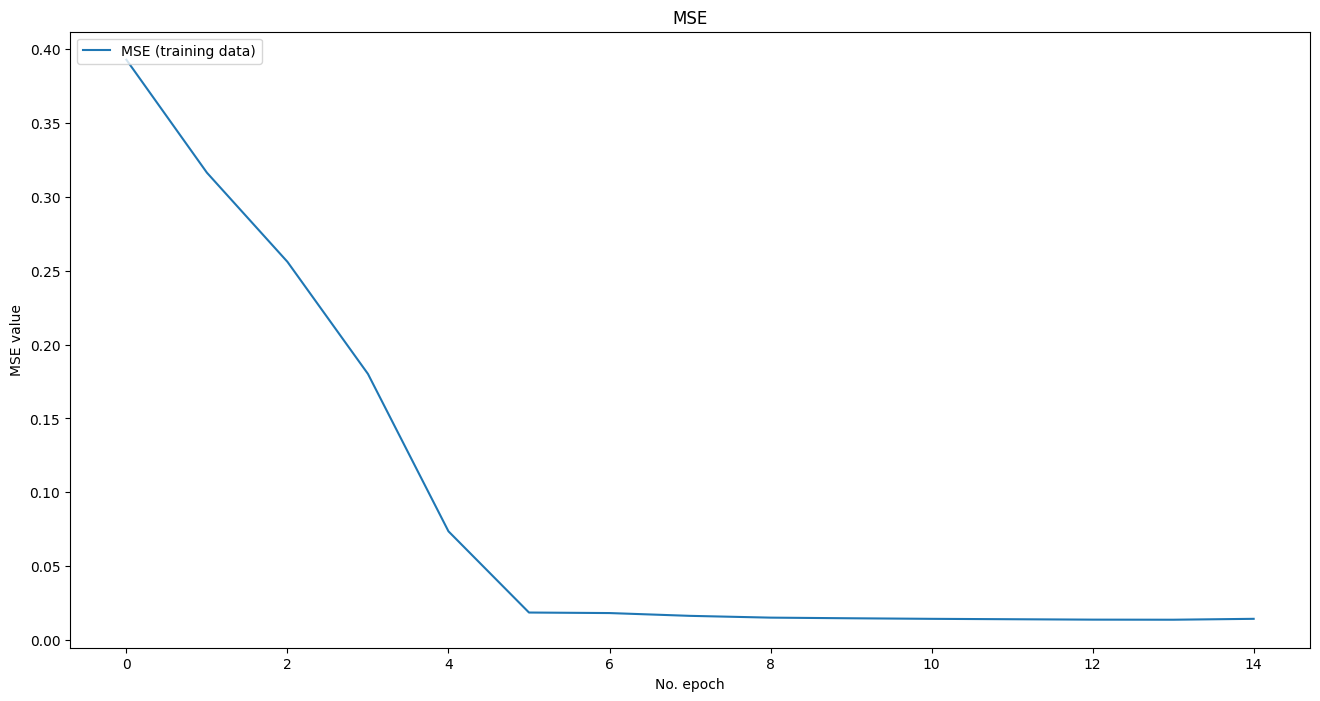

In [59]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [60]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

725.6105769230769

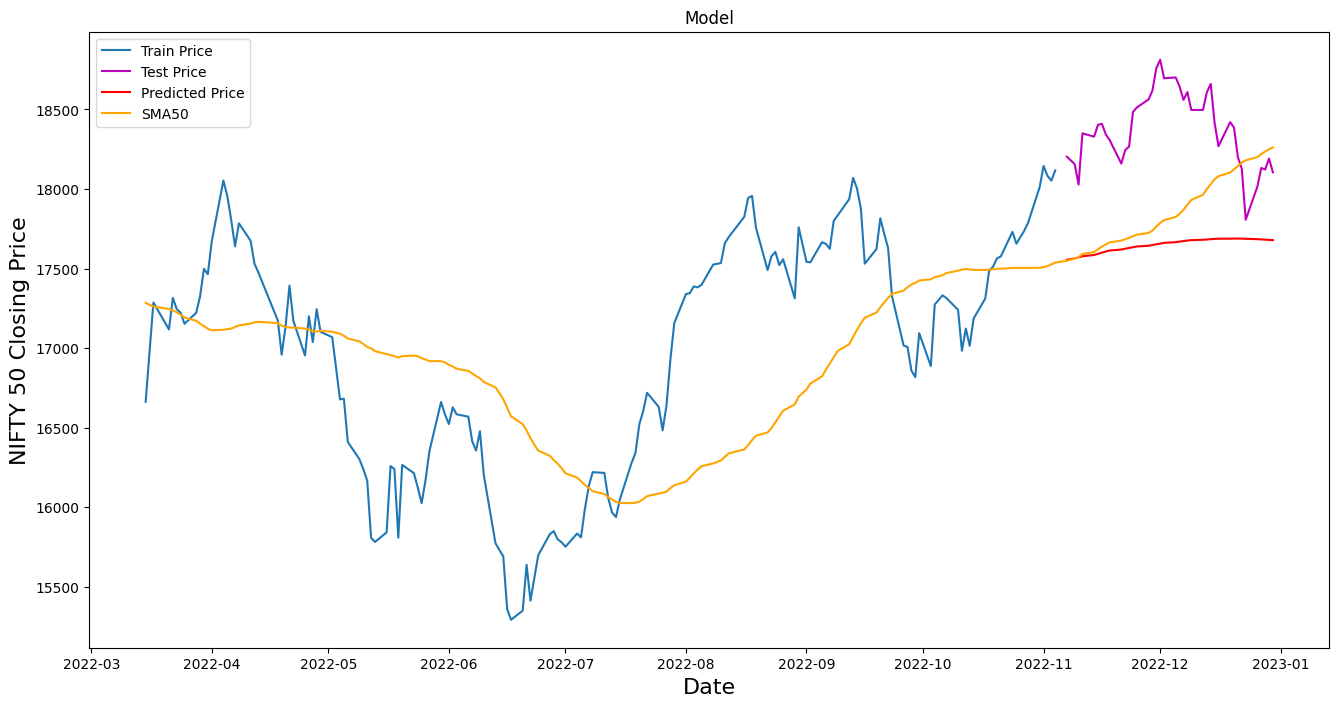

In [61]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [62]:
# the actual values  and predicted prices
test

,Close,predictions
Date,,
2022-11-07,18202.800781,17555.740234
2022-11-09,18157.000000,17563.332031
2022-11-10,18028.199219,17570.759766
2022-11-11,18349.699219,17577.574219
2022-11-14,18329.150391,17585.238281
2022-11-15,18403.400391,17592.607422
2022-11-16,18409.650391,17599.996094
2022-11-17,18343.900391,17607.123047
2022-11-18,18307.650391,17613.697266


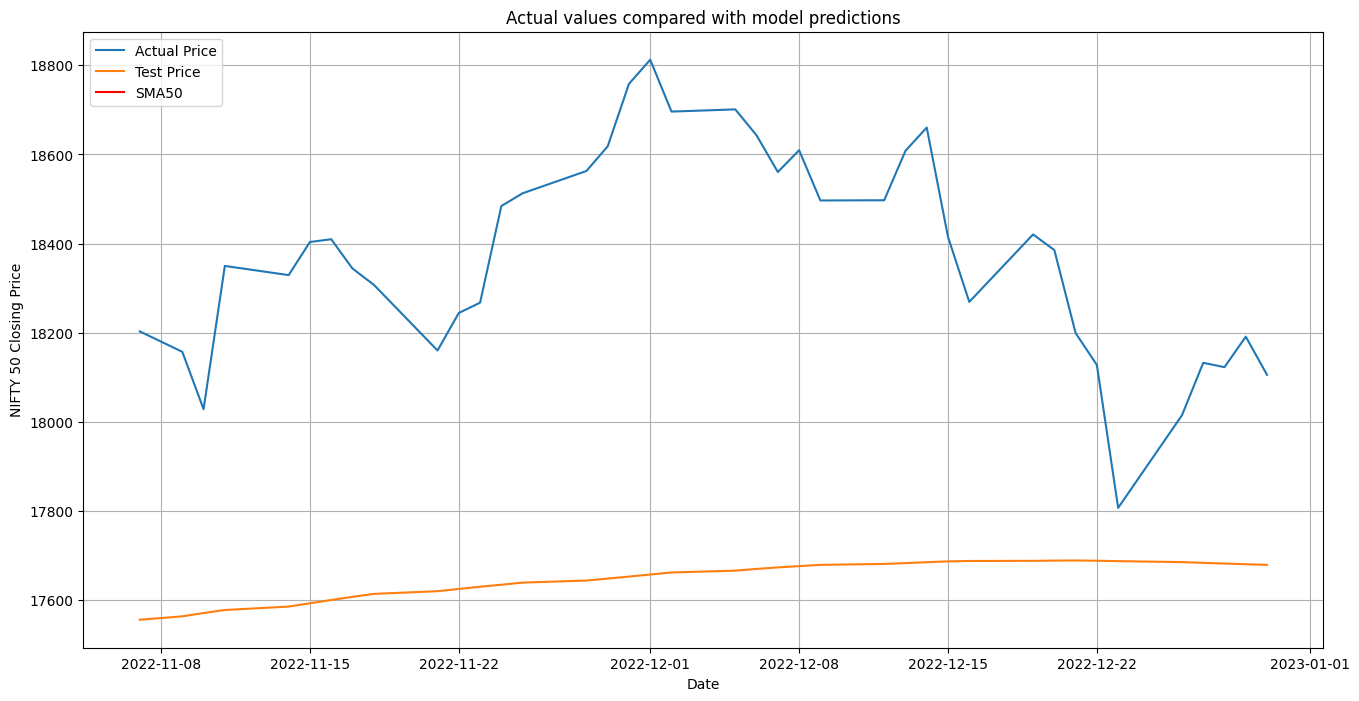

In [63]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

In [64]:
# Building the model
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(8, return_sequences=True))
model.add(LSTM(4))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 80, 32)            4352      
                                                                 
 lstm_6 (LSTM)               (None, 80, 16)            3136      
                                                                 
 lstm_7 (LSTM)               (None, 80, 8)             800       
                                                                 
 lstm_8 (LSTM)               (None, 4)                 208       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 8,501
Trainable params: 8,501
Non-trainable params: 0
_________________________________________________________________


In [65]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)


Epoch 1/15
16/16 [==============================] - 8s 53ms/step - loss: 0.1696
Epoch 2/15
16/16 [==============================] - 1s 50ms/step - loss: 0.0217
Epoch 3/15
16/16 [==============================] - 1s 81ms/step - loss: 0.0175
Epoch 4/15
16/16 [==============================] - 1s 58ms/step - loss: 0.0161
Epoch 5/15
16/16 [==============================] - 1s 61ms/step - loss: 0.0132
Epoch 6/15
16/16 [==============================] - 1s 51ms/step - loss: 0.0118
Epoch 7/15
16/16 [==============================] - 1s 77ms/step - loss: 0.0115
Epoch 8/15
16/16 [==============================] - 1s 80ms/step - loss: 0.0104
Epoch 9/15
16/16 [==============================] - 1s 65ms/step - loss: 0.0102
Epoch 10/15
16/16 [==============================] - 1s 70ms/step - loss: 0.0099
Epoch 11/15
16/16 [==============================] - 1s 55ms/step - loss: 0.0089
Epoch 12/15
16/16 [==============================] - 2s 105ms/step - loss: 0.0080
Epoch 13/15
16/16 [=================

In [67]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 3s 565ms/step


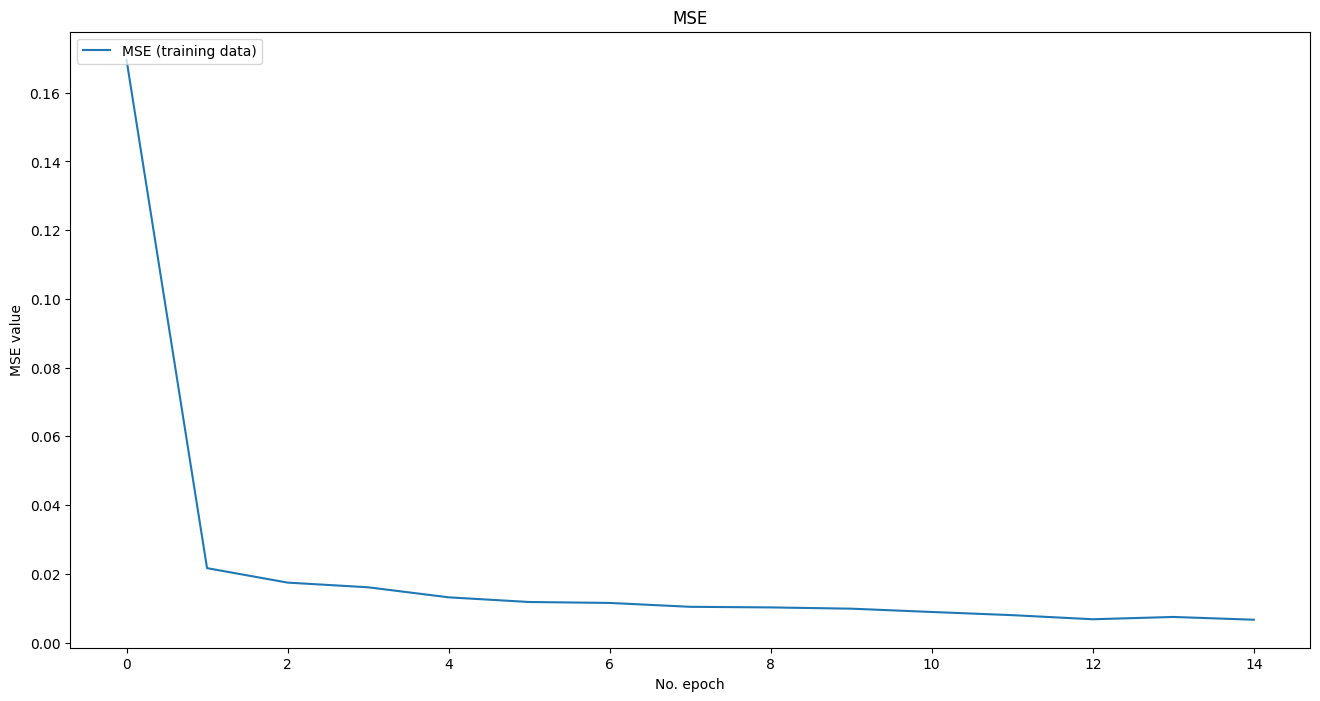

In [68]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


In [69]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

812.6921073717949

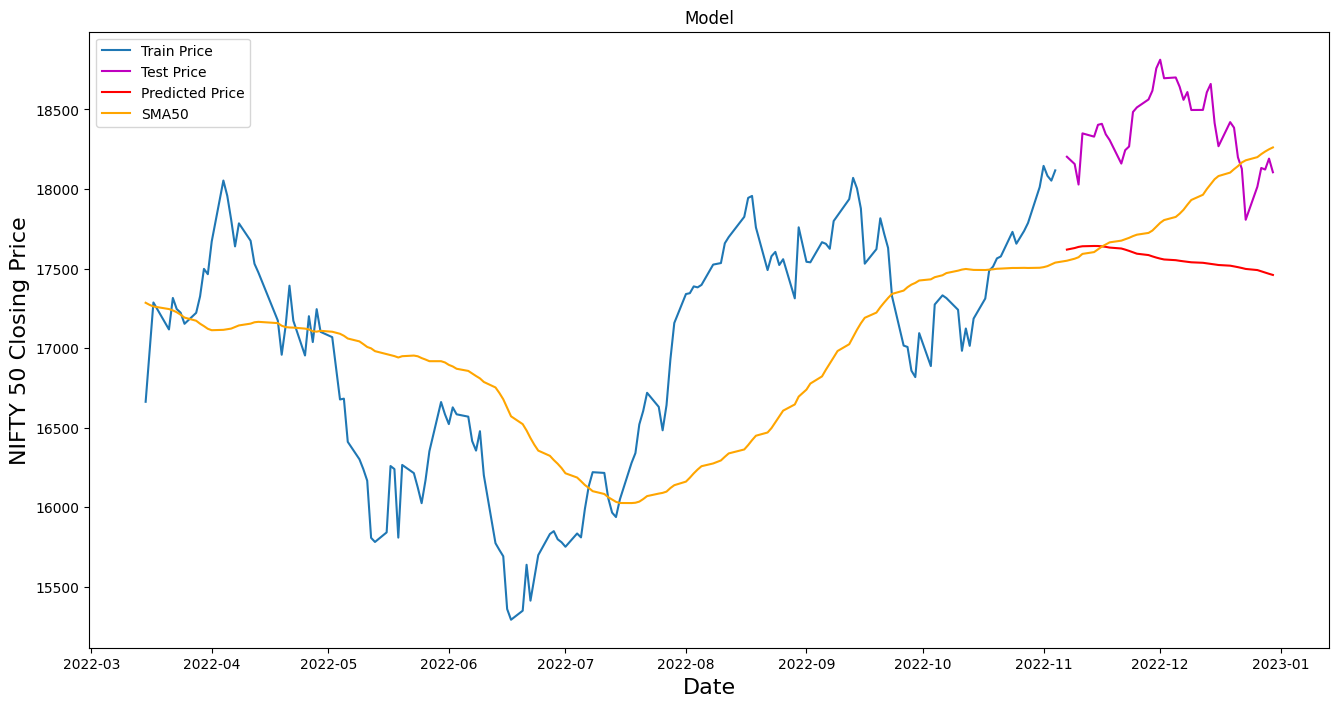

In [70]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [71]:
# the actual values  and predicted prices
test

,Close,predictions
Date,,
2022-11-07,18202.800781,17619.318359
2022-11-09,18157.000000,17629.150391
2022-11-10,18028.199219,17636.226562
2022-11-11,18349.699219,17640.300781
2022-11-14,18329.150391,17642.074219
2022-11-15,18403.400391,17641.798828
2022-11-16,18409.650391,17639.865234
2022-11-17,18343.900391,17636.566406
2022-11-18,18307.650391,17631.992188


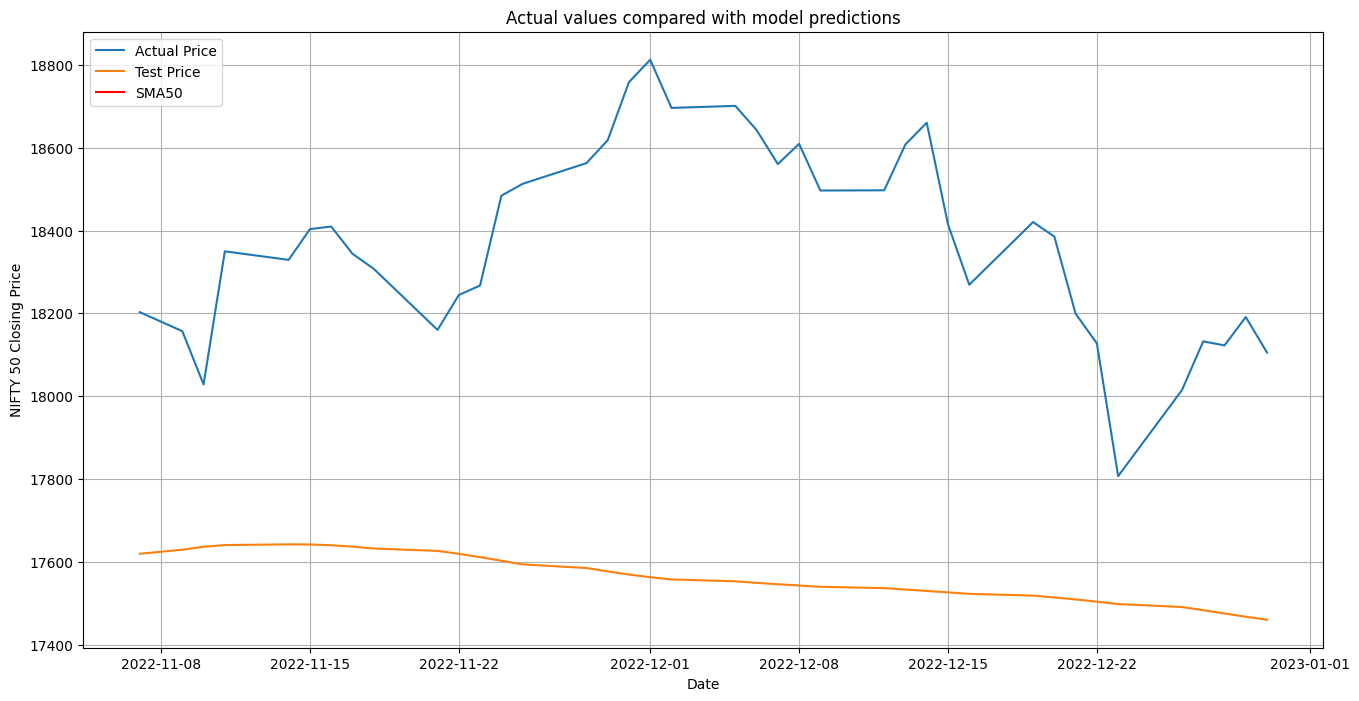

In [72]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

In [73]:
# Building the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 80, 50)            10400     
                                                                 
 lstm_10 (LSTM)              (None, 80, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [74]:
#compiling model
model.compile(optimizer='rmsprop', loss='mean_squared_error')


In [75]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
16/16 [==============================] - 8s 103ms/step - loss: 0.0584
Epoch 2/15
16/16 [==============================] - 2s 109ms/step - loss: 0.0203
Epoch 3/15
16/16 [==============================] - 2s 130ms/step - loss: 0.0185
Epoch 4/15
16/16 [==============================] - 1s 67ms/step - loss: 0.0177
Epoch 5/15
16/16 [==============================] - 1s 73ms/step - loss: 0.0122
Epoch 6/15
16/16 [==============================] - 1s 54ms/step - loss: 0.0151
Epoch 7/15
16/16 [==============================] - 1s 49ms/step - loss: 0.0117
Epoch 8/15
16/16 [==============================] - 1s 76ms/step - loss: 0.0151
Epoch 9/15
16/16 [==============================] - 1s 51ms/step - loss: 0.0101
Epoch 10/15
16/16 [==============================] - 1s 46ms/step - loss: 0.0123
Epoch 11/15
16/16 [==============================] - 1s 51ms/step - loss: 0.0092
Epoch 12/15
16/16 [==============================] - 1s 46ms/step - loss: 0.0093
Epoch 13/15
16/16 [===============

In [76]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 370ms/step


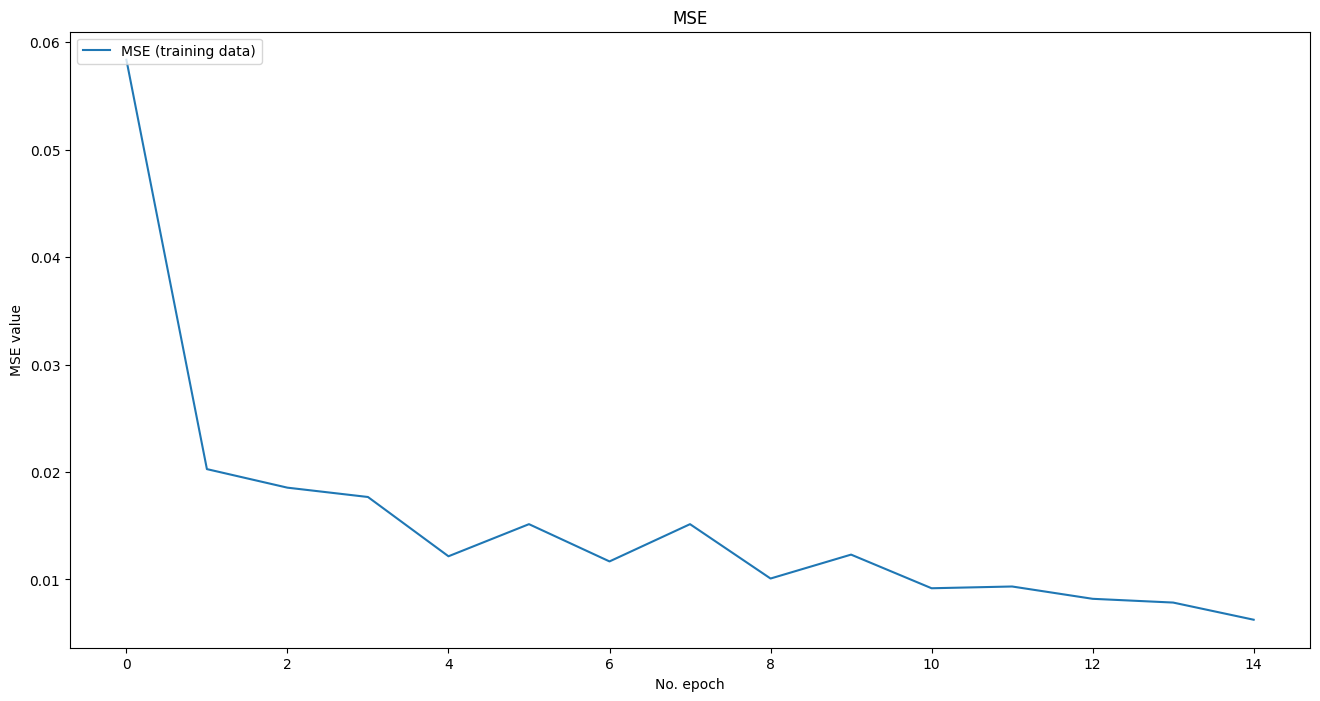

In [77]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [78]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

816.103766025641

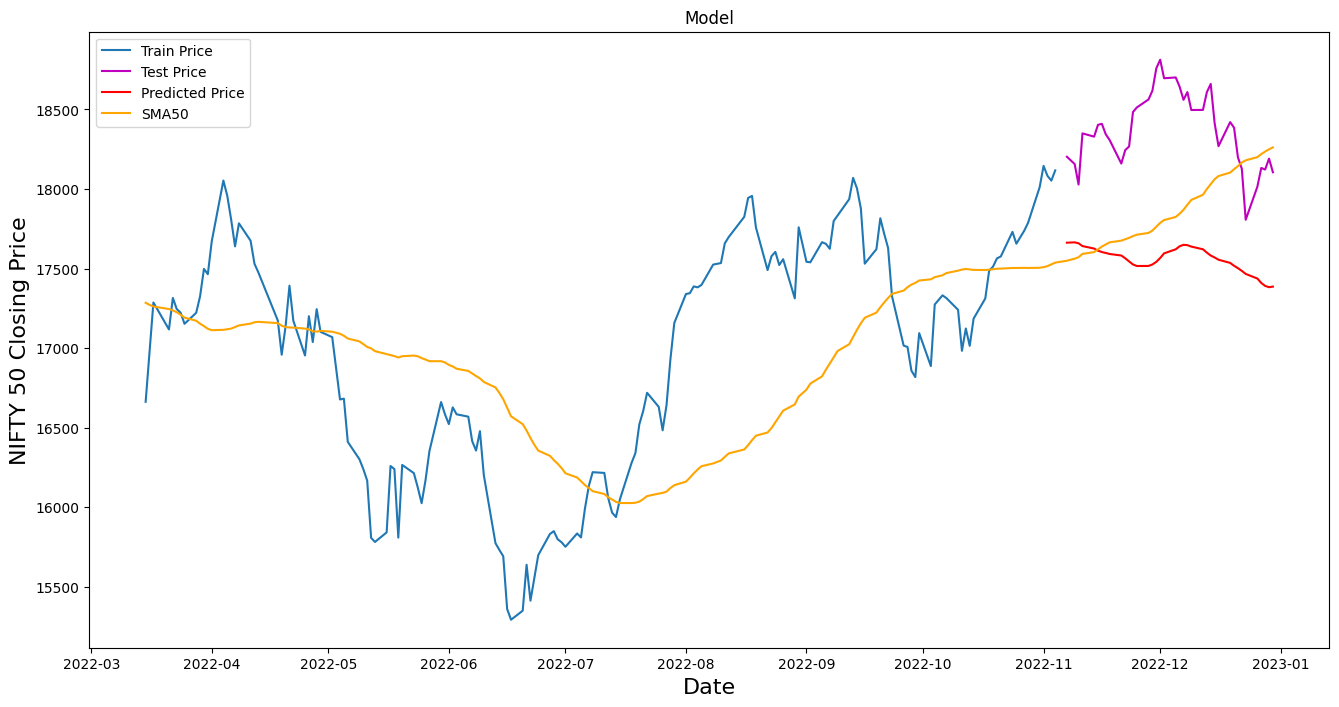

In [79]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [80]:
# the actual values  and predicted prices
test

,Close,predictions
Date,,
2022-11-07,18202.800781,17662.744141
2022-11-09,18157.000000,17664.822266
2022-11-10,18028.199219,17658.972656
2022-11-11,18349.699219,17641.460938
2022-11-14,18329.150391,17625.849609
2022-11-15,18403.400391,17612.660156
2022-11-16,18409.650391,17603.925781
2022-11-17,18343.900391,17598.318359
2022-11-18,18307.650391,17591.779297


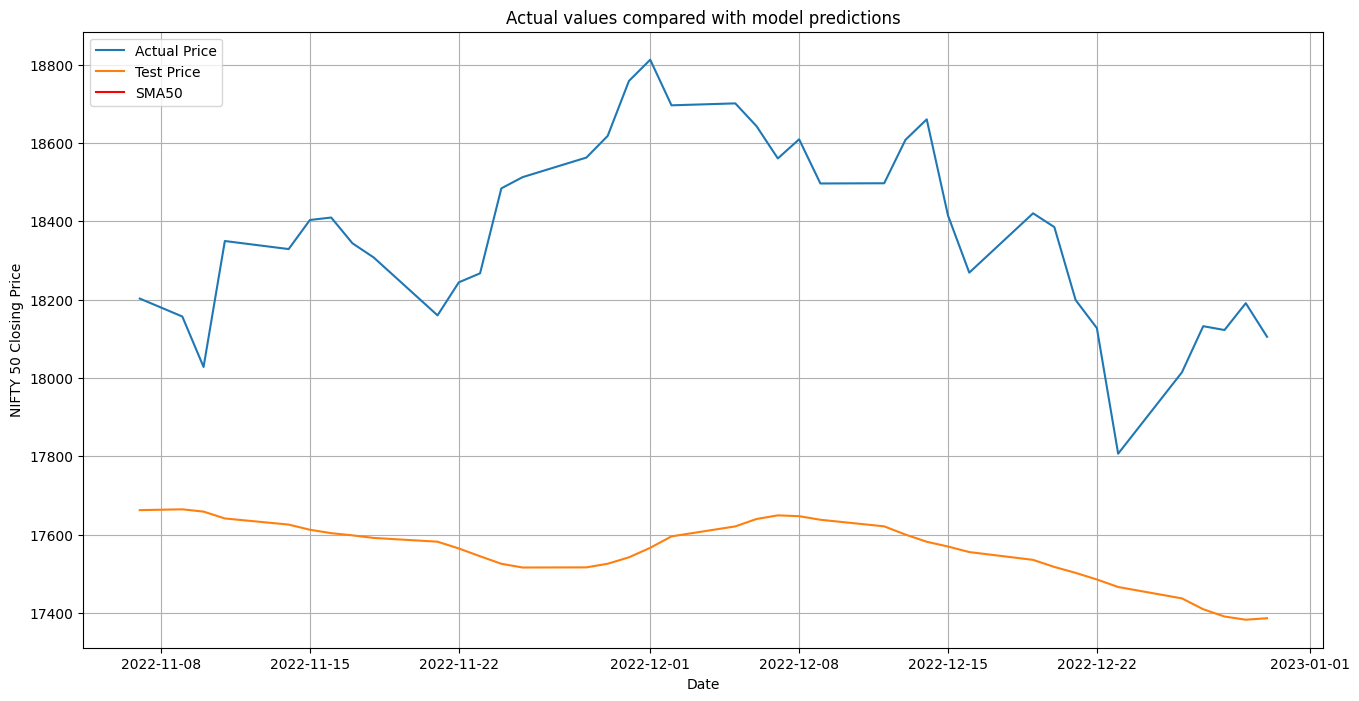

In [81]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

In [82]:
# The LSTM architecture
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 80, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 80, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 80, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 80, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 80, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 80, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)               

In [83]:
#compiling model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [84]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)


Epoch 1/15
16/16 [==============================] - 8s 120ms/step - loss: 0.0669
Epoch 2/15
16/16 [==============================] - 1s 69ms/step - loss: 0.0216
Epoch 3/15
16/16 [==============================] - 1s 88ms/step - loss: 0.0289
Epoch 4/15
16/16 [==============================] - 2s 95ms/step - loss: 0.0236
Epoch 5/15
16/16 [==============================] - 2s 106ms/step - loss: 0.0206
Epoch 6/15
16/16 [==============================] - 2s 100ms/step - loss: 0.0147
Epoch 7/15
16/16 [==============================] - 2s 119ms/step - loss: 0.0180
Epoch 8/15
16/16 [==============================] - 1s 59ms/step - loss: 0.0207
Epoch 9/15
16/16 [==============================] - 1s 56ms/step - loss: 0.0136
Epoch 10/15
16/16 [==============================] - 1s 64ms/step - loss: 0.0111
Epoch 11/15
16/16 [==============================] - 1s 75ms/step - loss: 0.0141
Epoch 12/15
16/16 [==============================] - 1s 54ms/step - loss: 0.0098
Epoch 13/15
16/16 [==============

In [85]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 2s 188ms/step


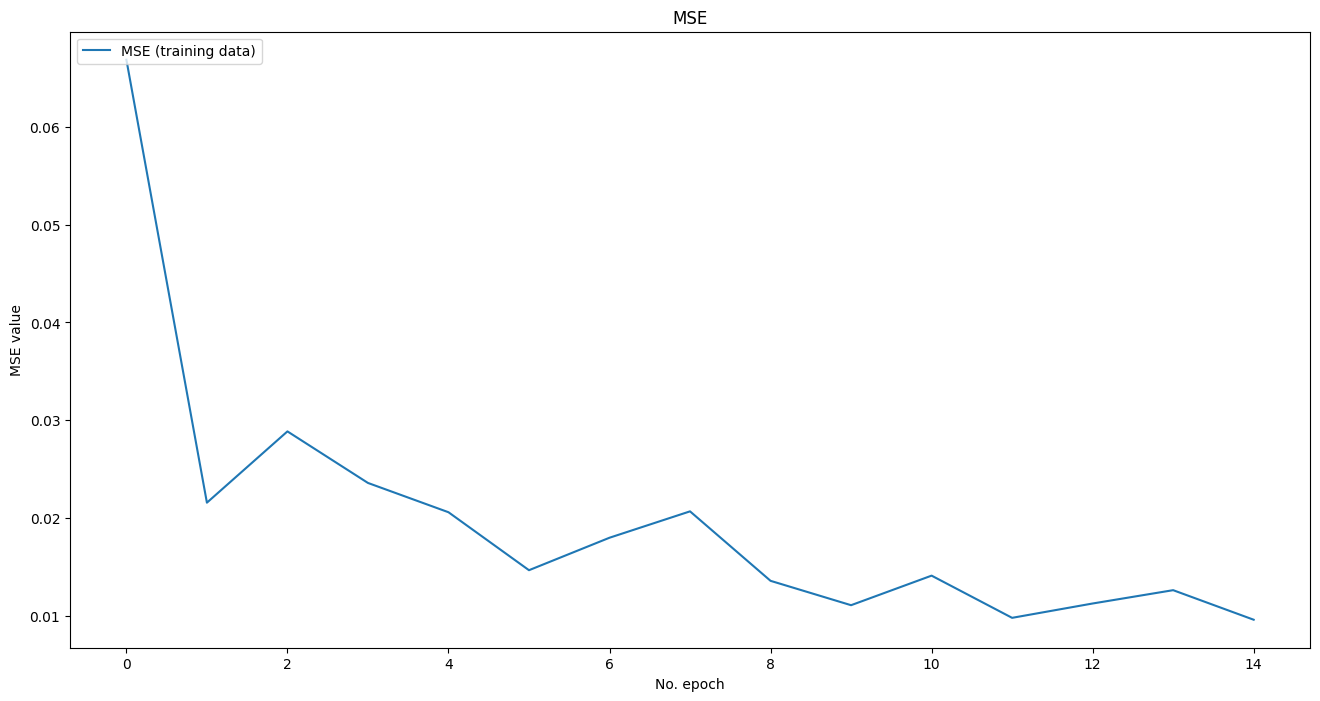

In [86]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [87]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

1042.8248697916667

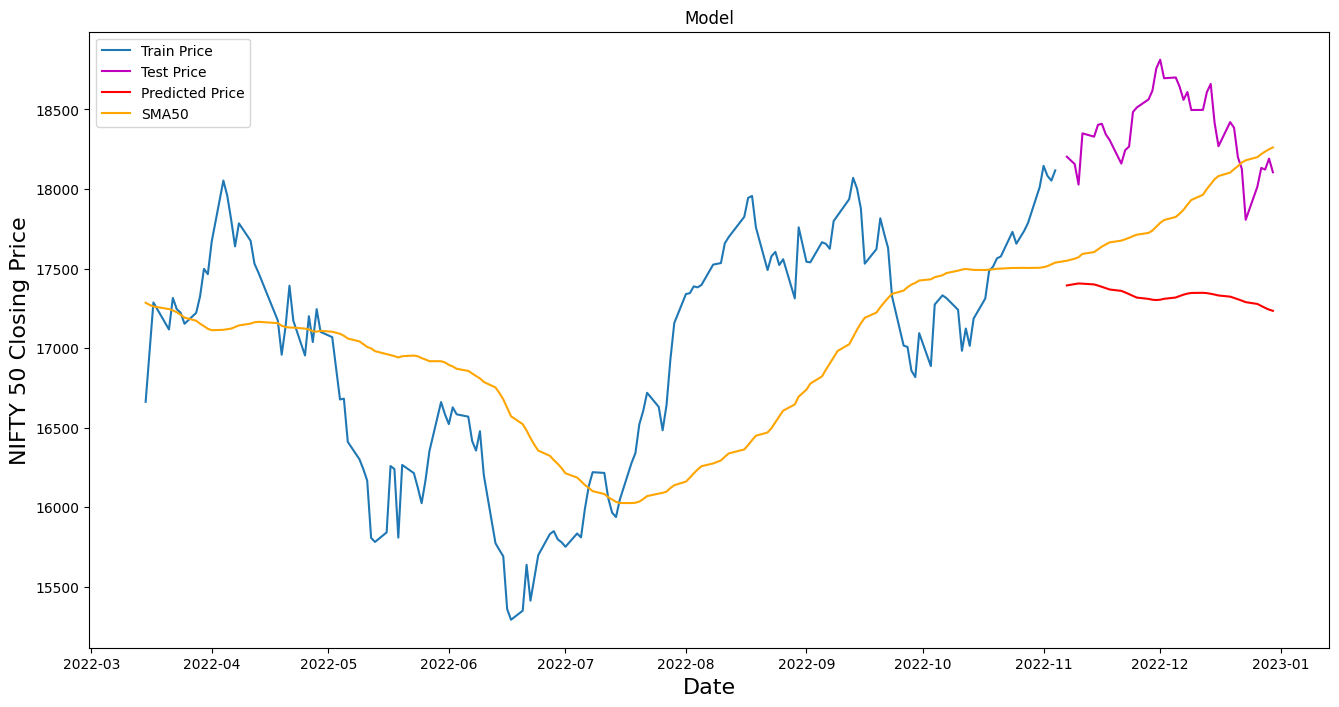

In [88]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()


In [89]:
# the actual values  and predicted prices
test

,Close,predictions
Date,,
2022-11-07,18202.800781,17394.107422
2022-11-09,18157.000000,17402.593750
2022-11-10,18028.199219,17406.480469
2022-11-11,18349.699219,17405.277344
2022-11-14,18329.150391,17400.490234
2022-11-15,18403.400391,17393.400391
2022-11-16,18409.650391,17385.289062
2022-11-17,18343.900391,17376.994141
2022-11-18,18307.650391,17368.626953


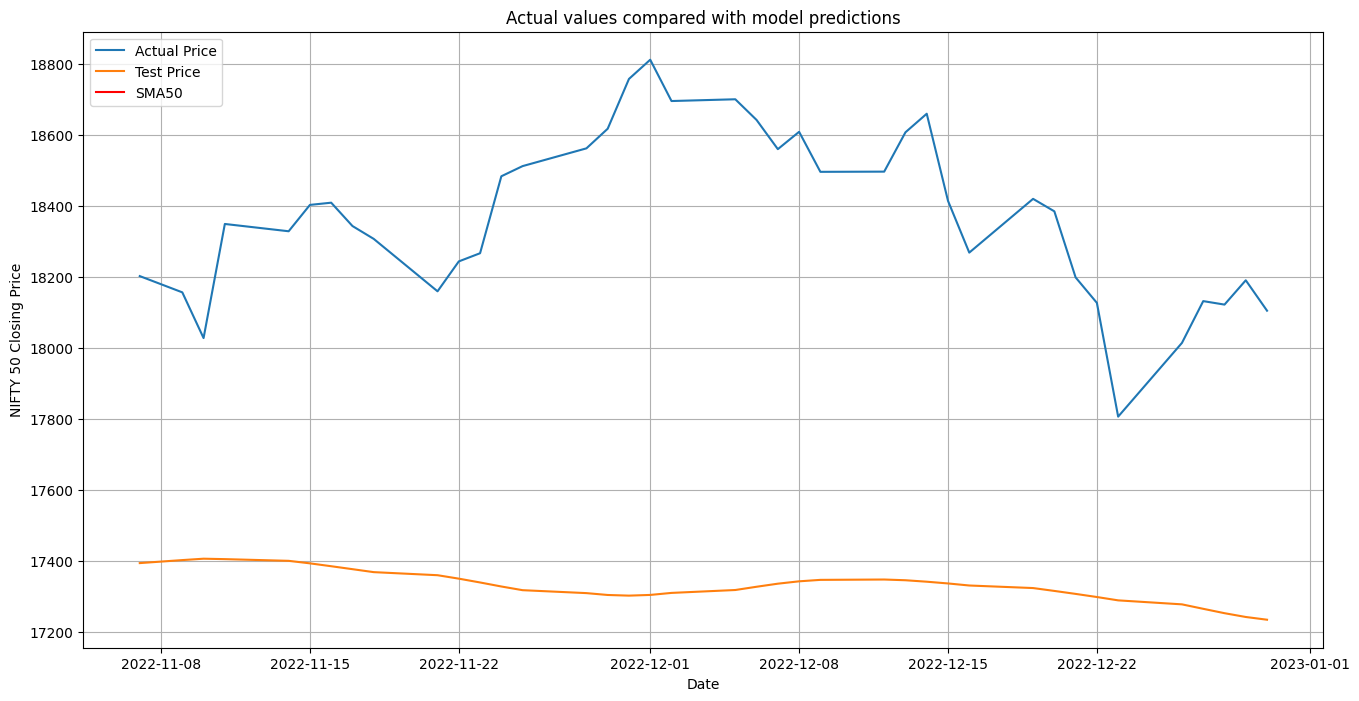

In [90]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

In [91]:
# Building the model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 80, 128)           66560     
                                                                 
 lstm_17 (LSTM)              (None, 80, 128)           131584    
                                                                 
 lstm_18 (LSTM)              (None, 80, 128)           131584    
                                                                 
 lstm_19 (LSTM)              (None, 80, 128)           131584    
                                                                 
 lstm_20 (LSTM)              (None, 128)               131584    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 593,025
Trainable params: 593,025
Non-tr

In [92]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')


In [93]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
16/16 [==============================] - 10s 217ms/step - loss: 0.1480
Epoch 2/15
16/16 [==============================] - 2s 95ms/step - loss: 0.0195
Epoch 3/15
16/16 [==============================] - 1s 83ms/step - loss: 0.0163
Epoch 4/15
16/16 [==============================] - 2s 106ms/step - loss: 0.0153
Epoch 5/15
16/16 [==============================] - 1s 73ms/step - loss: 0.0151
Epoch 6/15
16/16 [==============================] - 1s 69ms/step - loss: 0.0135
Epoch 7/15
16/16 [==============================] - 2s 151ms/step - loss: 0.0138
Epoch 8/15
16/16 [==============================] - 2s 98ms/step - loss: 0.0148
Epoch 9/15
16/16 [==============================] - 1s 66ms/step - loss: 0.0129
Epoch 10/15
16/16 [==============================] - 1s 68ms/step - loss: 0.0138
Epoch 11/15
16/16 [==============================] - 2s 123ms/step - loss: 0.0166
Epoch 12/15
16/16 [==============================] - 1s 79ms/step - loss: 0.0108
Epoch 13/15
16/16 [=============

In [94]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 2s 263ms/step


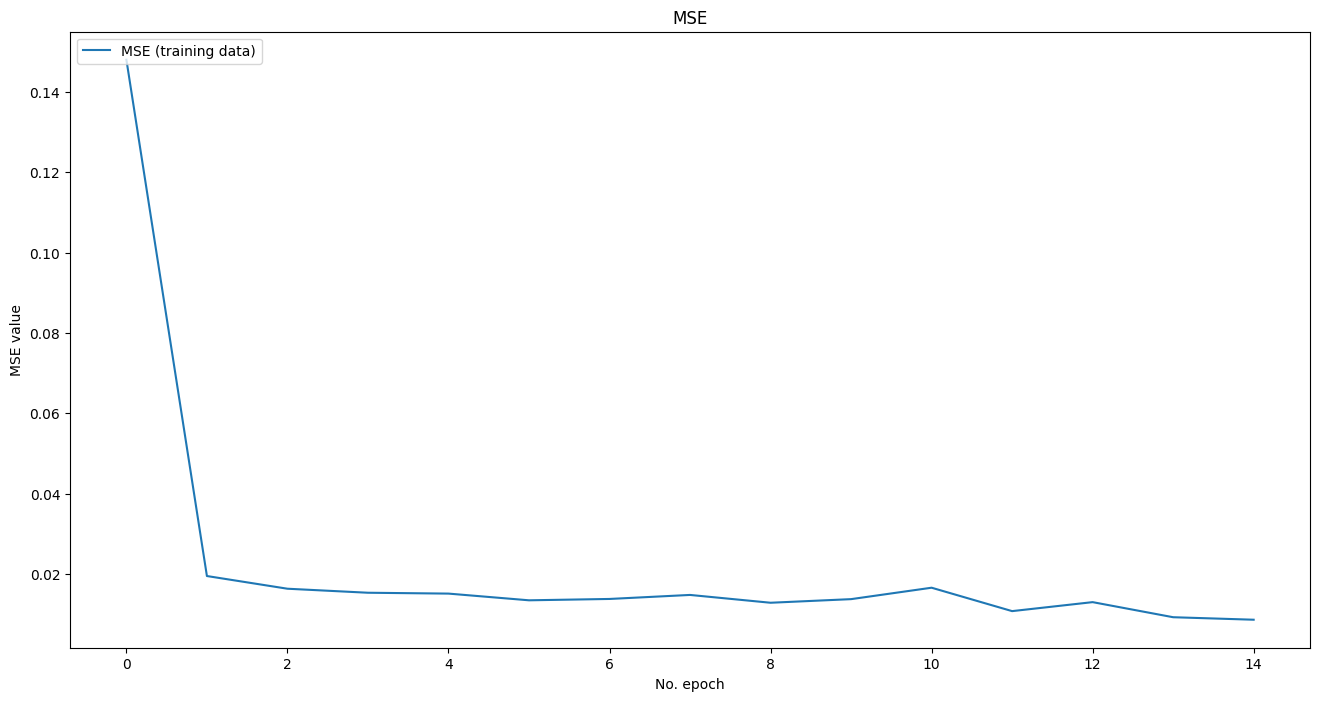

In [95]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [96]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

610.0782251602565

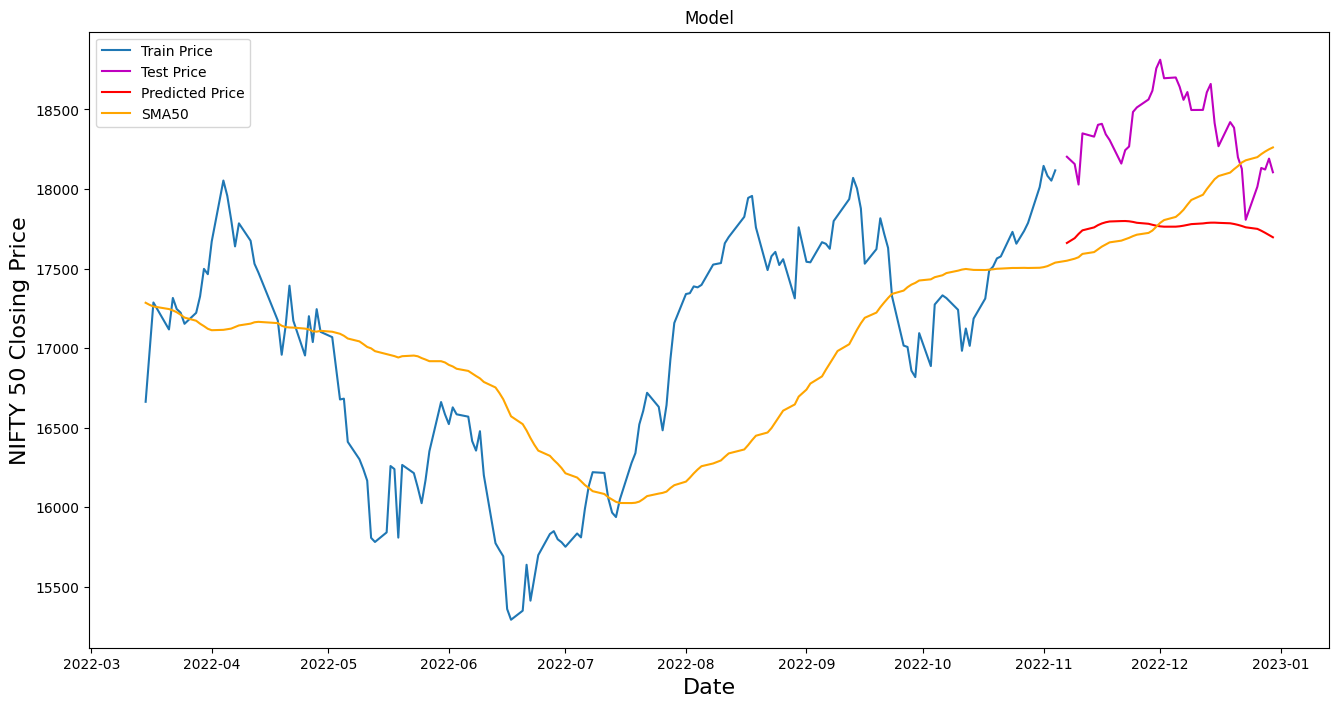

In [97]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [98]:
# the actual values  and predicted prices
test


,Close,predictions
Date,,
2022-11-07,18202.800781,17660.941406
2022-11-09,18157.000000,17691.033203
2022-11-10,18028.199219,17717.738281
2022-11-11,18349.699219,17740.394531
2022-11-14,18329.150391,17758.791016
2022-11-15,18403.400391,17773.076172
2022-11-16,18409.650391,17783.679688
2022-11-17,18343.900391,17791.162109
2022-11-18,18307.650391,17796.015625


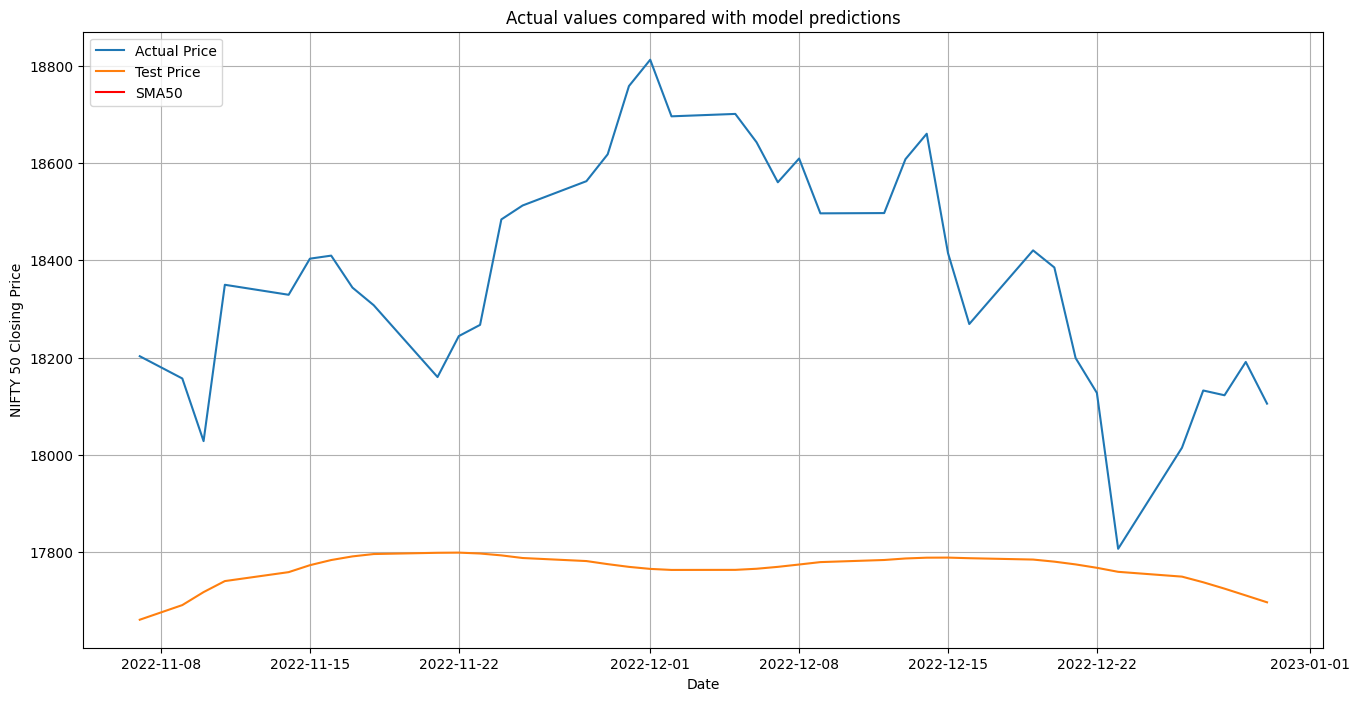

In [99]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself